In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_csv('../input/pokemon/Pokemon.csv',index_col=0)
import seaborn as sns
sns.set_theme(context='notebook', style='ticks', palette='colorblind', font='sans', font_scale=1.2, color_codes=True,rc={'figure.figsize':(15,8.27)}) # Liked this theme much more than Seaborn's default style
import itertools 

**Hello Kaggle, this is my first ever kernel after been a longtime lurker in this platform , I've put a lot effort into it and been inspired by many others notebooks which I'll mention and the end of this Kernel.**

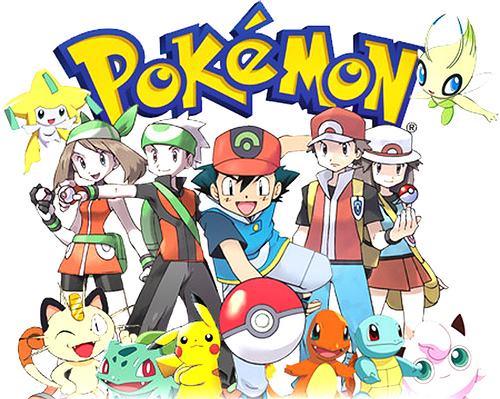

* [1. Basic Information from the Dataset.](#1.)
    - [1.1. Variable information.](#1.1)
    - [1.2. Basic summary of the dataset.](#1.2)
* [2.Cleaning the DataFrame.](#2.)
* [3.Data analysis.](#3.)
    - [3.1. Type 1.](#3.1)
    - [3.2. Type 1-2.](#3.2)
    - [3.3. Type 1-2 Combined.](#3.3)
    - [3.4. Distribution for Legendary and non-Legendary Pokemons.](#3.4)
    - [3.5. Density plots LEGENDARY VS NON-LEGENDARY Pokemons.](#3.5)
    - [3.6. Best Type for each variable.](#3.6)
    - [3.7. TOP 10 Pokemons per stat.](#3.7)
    - [3.8. Comparing Pokemon's Generations.](#3.8)
    - [3.9. Number of Pokemons by generation.](#3.9)
    - [3.10. Number of Legendary Pokemons by Generation.](#3.10)
* [4. Summary.](#4.)
* [5. References.](#5.)

<a id="1."></a>

## 1. Basic info from the Dataset

In this section I'll focus on getting the basic insights out of the data to get a general sense of what We are working with.

In [ ]:
df.head() # Gives us a glimpse of the firts 5 elements of Pokemon's Dataset

In [ ]:
df.tail() # A glimpse of the last elements of Pokemon's Dataset

In [ ]:
df.columns # Not really neccesary in this particular case, We can visualize the columns in head() or tail()

In [ ]:
df.shape # It's important to know the shape, as of right now we know there are 800 observations and 12 variables 

In [ ]:
df.dtypes #Gives us a glimpse of what type of data we have on the dataset in case we wish to change something with the astype function

In [ ]:
df.info() # To know the Non-null count the datatypes, the index and the columns(We already had them)

**Out of all the info something that jumps out immediately is the 414 non null values in TYPE 2, that is something due to the fact that many Pokemons don't really have a second TYPE,only type such as grass, water etc. Except the 386 NaN values in TYPE 2, everything else seems to be sorted.**

In [ ]:
df.describe().T # Gives us a statistical summary of the data , it can also be done without the .T

<a id="1.1"></a>
### 1.1.  Variable Information

**#**: Each Pokemon's ID.

**Name**: Name of each pokemon

**Type 1**: The primary type of each Pokemon which determines their strengths and weaknesses.

**Type 2**: The secundary type for each Pokemon, which determines their secondary strengths and weaknesses.

**Total**: The sum of all the other stats 

**HP**: hit points, or health, defines how much damage a pokemon can withstand before fainting.

**Attack**: the base modifier for normal attacks (eg. Scratch, Punch).

**Defense**: the base damage resistance against normal attacks.

**SP Atk**: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam).

**SP Def**: the base damage resistance against special attacks.

**Speed**: determines which pokemon attacks first each round.

<a id="1.2"></a>
### 1.2. Basic Summary of the data 

**From the dataset W have been able to draw the following premiliminary conclusions  :** 

   1. This dataset is related the **Pokemon** videogame series having 12 **variables** and 800 **observations** throughout 6 generations across different consoles such as DS, Gamecube, Nintendo 64, Nintendo Switch etc.
   
   
   2. Regarding the dataset, as mentioned before except for **386 NaN** values in TYPE 2 the rest of dtypes seem perfect and there are different types of data available such as **booleans(LEGENDARY column),integers and objects.**
   
   
   3. Descriptive analysis shows there aren't any unexplainable data values such as 0 max values or 0 minimum values, therefore the Dataset is perfect.
        

<a id="2."></a>
## 2. Cleaning the DataFrame

Let's proceed to do a Data cleaning, meaning the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within the dataset.
When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable.

**Let's start with making all the columns uppercase so that when they are called We won't be constantly going from uppercase to lowercase**

In [ ]:
df.columns = df.columns.str.upper() # Changing all the column names to Upper case 
df.head()

**Once the all the columns have been changed to Uppercase letters, let's proceed with the removal of some unnecessary repetitive words, specifically the Mega prefix in the Name column. Then We'll proceed to set a new index, meaning changing the column 'NAME' to be the new index**

In [ ]:
df.set_index('NAME',inplace=True) # Setting the name to be the new index
df.index = df.index.str.replace(".*(?=Mega)", "") # Eliminating the Mega prefix


<a id="3."></a>
## 3. Data Analysis

**In the data analysis section,  We'll be analyzing the characteristics and employing  data visualization methods?**

<a id="3.1"></a>
### 3.1. Type 1

**How many different types of Pokemons are there in the TYPE 1 column?**


In [ ]:
#First We'll observe the number of types of Pokemon on the TYPE 1 column and then We'll count them and visualize them with the value_counts function

def type_1():
    print('These are the types of Pokemon in TYPE 1 column in the dataset : \n\n',df['TYPE 1'].unique(),'\n')
    print('There are a total of : \n\n',df['TYPE 1'].nunique(),'different types of pokemons')
    print('\n\nThese are the value counts of the type of Pokemons in column TYPE 1\n\n',df['TYPE 1'].value_counts())

    #Now that the questions asked before have been answered, Let's proceed to plot the data using Matplotlib
    
    type_1_number = df['TYPE 1'].value_counts()
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(type_1_number.index,type_1_number.values) # Nice way to avoid creating a variable by using .index and .values.
    # This for loop is to place the value on top of the bar
    for i in range(type_1_number.shape[0]):
        ax.text(i, type_1_number.values[i]+1, type_1_number.values[i], horizontalalignment='center')
    ax.set_xlabel('Types of Pokemon')
    ax.set_ylabel('Number of Types 1 of Pokemon')
    ax.set_title('Count types 1 of Pokemons')
    plt.tight_layout()
type_1()
#sns.countplot(x="TYPE 1", data=df,saturation=1) Remember it could've been used and it would've been faster

**We are able to observe that the type Water, followed  by the Normal type of Pokemons, are the largest in the column TYPE 1.** 

**Now that the first questions regarding the column TYPE 1, let's follow the same procedure with the second column, TYPE 2**

<a id="3.2"></a>
### 3.2. Type 2

In [ ]:
def type_2():

    print('These are the types of Pokemon in TYPE 2 column in the dataset :\n\n',df['TYPE 2'].unique(),'\n')
    print('There are a total of : \n\n',df['TYPE 2'].nunique(),'different types 2  of pokemons')
    print('\n\nThese are the value counts of the type of Pokemons in column TYPE 2\n\n',df['TYPE 2'].value_counts())
    
    # The porpuse of the \n was to start each print statement in a different line
    
    type_2_number = df['TYPE 2'].value_counts()
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(type_2_number.index,type_2_number.values,color='red')
    for i in range(type_2_number.shape[0]):
        ax.text(i, type_2_number.values[i]+1, type_2_number.values[i], horizontalalignment='center')
    ax.set_xlabel('Types of Pokemon')
    ax.set_ylabel('Number of Types 2  of Pokemon')
    ax.set_title('Count types 2 of Pokemons')
    plt.tight_layout()
type_2()

#sns.countplot(x="TYPE 1", data=df,saturation=1) Remember it could've been used and it would've been better

**We can to observe that the type Flying, followed closely by the Ground type of Pokemon, are the largest in the column TYPE 2.**

**Regarding the type of Pokemons in columns TYPE 1 and TYPE 2 the only remarkable difference is the presence of Nan values in the column  TYPE 2, as mentioned before, It's due to fact that some Pokemons don't really have a second type.**


**Let's observe both the TYPE 1 and TYPE 2 Pokemons in a stacked Barplot**

In [ ]:
def type_3():
    type_2_number = df['TYPE 2'].value_counts()
    type_1_number = df['TYPE 1'].value_counts()
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(type_1_number.index,type_1_number.values,color='red')
    ax.bar(type_2_number.index,type_2_number.values,color='blue')
    ax.set_xlabel('Types of Pokemon')
    ax.set_ylabel('Total number types of Pokemon')
    ax.set_title('Total count types of Pokemon')
    plt.tight_layout()
type_3()

#sns.countplot(x="TYPE 1", data=df,saturation=1) Remember it could've been used and it would've been better

**It's worth mentioning We could've used Seaborn to plot both columns TYPE 1 and TYPE 2, here's a quick example.**

In [ ]:
sns.countplot(x="TYPE 1", data=df,saturation=1)
plt.tight_layout()

**Now let's proceed to combine both TYPE 1 and TYPE 2 columns to extract as much information as possible.**

<a id="3.3"></a>
### 3.3. Type 1-2 Combined

In [ ]:
def combination_of_type1_type2 ():
    df['TYPE 1-2'] = df['TYPE 1'] + " - " + df['TYPE 2']
    return df['TYPE 1-2'].value_counts()
combination_of_type1_type2 ()

**Wow, huge surprise that the most common combination of Pokemon types 1 and type 2 is Normal-Flying, followed by the Grass-Poison type.**

**How many combinations of type 1 and type 2 exist?**

In [ ]:
def type1_type2_number_of_combinations ():
    df['TYPE 1-2'] = df['TYPE 1'] + " - " + df['TYPE 2']
    return df['TYPE 1-2'].nunique()
type1_type2_number_of_combinations ()

**In total there are 136 combinations between TYPE1 and TYPE 2 Pokemons**

**Given the 136 and for the purpose of simplicity, let's plot the top 10 most common combinations found.**

In [ ]:
def type_4():
    type_4_number = df['TYPE 1-2'].value_counts()[0:10]
    fig,ax = plt.subplots(figsize=(19,8))
    ax.bar(type_4_number.index,type_4_number.values,color='green')
    for i in range(type_4_number.shape[0]):
        ax.text(i, type_4_number.values[i]+1, type_4_number.values[i], horizontalalignment='center')
    ax.set_xlabel('Types of Pokemon')
    ax.set_ylabel('Total count of Pokemons types')
    ax.set_title('Total number of Pokemons types')
    plt.tight_layout()
type_4()

<a id="3.4"></a>
### 3.4. Distribution for Legendary and non-Legendary Pokemons

**Now let's go through some histograms to analyze 7 different variables from 'TOTAL' to 'ATTACK (FOR NON LEGENDARY POKEMONS)'**

In [ ]:
non_legendary = df[df['LEGENDARY']==False] # False , therfore it's a non-legendary Pokemon
legendary = df[df['LEGENDARY']==True]
fig = non_legendary.iloc[:,0:9].hist(bins=20, color='red', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 


**Now let's follow the same procedure for LEGENDARY POKEMONS**

In [ ]:
fig = legendary.iloc[:,0:9].hist(bins=20, color='blue', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

**We knew before hand that the LEGENDARY Pokemons were stronger than non legendary Pokemons but the histograms clearly confirm that case** 


<a id="3.5"></a>
### 3.5. Density plots LEGENDARY VS NON-LEGENDARY Pokemons.

**Now let's compare them more closely using density plots and Seaborn**

In [ ]:
import matplotlib.gridspec as gridspec
fig, axes = plt.subplots(3, 3, figsize=(13, 9))


sns.distplot(legendary['ATTACK'],hist=False,color='blue',kde_kws={"shade": True},ax=axes[0][1])
sns.distplot(non_legendary['ATTACK'],hist=False,color='red',kde_kws={"shade": True},ax=axes[0][1])

sns.distplot(legendary['HP'],hist=False,color='blue',kde_kws={"shade": True},ax=axes[0][0])
sns.distplot(non_legendary['HP'],hist=False,color='red',kde_kws={"shade": True},ax=axes[0][0])

sns.distplot(legendary['DEFENSE'],hist=False,color='blue',kde_kws={"shade": True},ax=axes[0][2])
sns.distplot(non_legendary['DEFENSE'],hist=False,color='red',kde_kws={"shade": True},ax=axes[0][2])

sns.distplot(legendary['SP. ATK'],hist=False,color='blue',kde_kws={"shade": True},ax=axes[1][0])
sns.distplot(non_legendary['SP. ATK'],hist=False,color='red',kde_kws={"shade": True},ax=axes[1][0])

sns.distplot(legendary['SP. DEF'],hist=False,color='blue',kde_kws={"shade": True},ax=axes[1][1])
sns.distplot(non_legendary['SP. DEF'],hist=False,color='red',kde_kws={"shade": True},ax=axes[1][1])

sns.distplot(legendary['SPEED'],hist=False,color='blue',kde_kws={"shade": True},ax=axes[1][2])
sns.distplot(non_legendary['SPEED'],hist=False,color='red',kde_kws={"shade": True},ax=axes[1][2])


#Grid's used to make 3 times bigger the TOTAL density plot at the end
gs1 = gridspec.GridSpec(3, 1)
ax1 = fig.add_subplot(gs1[2,:])


sns.distplot(legendary['TOTAL'],hist=False,color='blue',kde_kws={"shade": True},ax=ax1)
sns.distplot(non_legendary['TOTAL'],hist=False,color='red',kde_kws={"shade": True},ax=ax1)

axes[2,0].axis('off')
axes[2,1].axis('off')
axes[2,2].axis('off')



fig.legend(labels=['LEGENDARY','NON-LEGENDARY'],loc=4)

plt.tight_layout()
plt.show()
gs1.tight_layout(fig)

**The density plots clearly show the LEGENDARY POKEMONS have overall greater stats than the non-LEGENDARY POKEMONS.**

<a id="3.6"></a>
### 3.6. Best Type for each variable

**Let's determine what the best type of Pokemon for each variable using Boxplots**


In [ ]:
def poke_box_HP():
    fig = plt.figure()
    ax = sns.boxplot(y="TYPE 1", x="HP",
            data=df)
    #dragon_quan = df[df['TYPE 1']=='Dragon']['hp'].quantile(.75).round()
    #In some cases it does accept float , if that's the case, use round()
    
    plt.axvline(df[df['TYPE 1']=='Dragon']['HP'].quantile(.5), ls='--', linewidth=1, color='red')
    plt.text( (df[df['TYPE 1']=='Dragon']['HP']-14).quantile(.5),18,'Median/Q2')
    
    
    
plt.tight_layout()
poke_box_HP()

**The dragon type seems to have the higher HP with the highest median/Q2 and surely the highest mean. The outliers are LEGENDARY Pokemons.**

In [ ]:
def poke_box_attack():
    fig = plt.figure()
    ax = sns.boxplot(y="TYPE 1", x="ATTACK",
            data=df)
    #dragon_quan = df[df['TYPE 1']=='Dragon']['ATTACK'].quantile(.75).round()
    #In some cases it does accept 
    plt.axvline(df[df['TYPE 1']=='Dragon']['ATTACK'].quantile(.5), ls='--', linewidth=1, color='red')
    plt.text( (df[df['TYPE 1']=='Dragon']['ATTACK']-10).quantile(.5),18,'Median/Q2')
    plt.tight_layout()
poke_box_attack()

**Once again the dragon type seems to have on average the strongest attacks, having the highest median and the highest Q3.**

In [ ]:
def poke_box_defense():
    fig = plt.figure()
    ax = sns.boxplot(y="TYPE 1", x="DEFENSE",
            data=df)
    
    plt.axvline(df[df['TYPE 1']=='Steel']['DEFENSE'].quantile(.5), ls='--', linewidth=1, color='red')
    plt.text( (df[df['TYPE 1']=='Steel']['DEFENSE']-12).quantile(.5),18,'Median/Q2')
    
plt.tight_layout()
poke_box_defense()

**The steel type is the strongest type of Pokemon regarding DEFENSE, having the median higher than Q3 of all the other types and of course having the highest mean and Q3**

In [ ]:
def poke_box_sp_attack():
    fig = plt.figure()
    ax = sns.boxplot(y="TYPE 1", x="SP. ATK",
            data=df)    
    plt.axvline(df[df['TYPE 1']=='Dragon']['SP. ATK'].quantile(.5), ls='--', linewidth=1, color='red')
    plt.text( (df[df['TYPE 1']=='Dragon']['SP. ATK']-2).quantile(.5),18,'Q2')
    
plt.tight_layout()
poke_box_sp_attack()

**The psychic type and the dragon type have on average the best SP.ATK. In the pokemon series. **

In [ ]:
def poke_box_sp_defense():
    fig = plt.figure()
    ax = sns.boxplot(y="TYPE 1", x="SP. DEF",
            data=df)
    
    plt.axvline(df[df['TYPE 1']=='Psychic']['SP. DEF'].quantile(.5), ls='--', linewidth=1, color='red')
    plt.text( (df[df['TYPE 1']=='Psychic']['SP. DEF']-14).quantile(.5),18,'Median/Q2')

    
plt.tight_layout()
poke_box_sp_defense()

**This time the psychic type beats the dragon type, having practically the same median and the psychic type having the highest Q3.**

In [ ]:
def poke_box_speed():
    fig = plt.figure()
    ax = sns.boxplot(y="TYPE 1", x="SPEED",
            data=df)
    plt.axvline(df[df['TYPE 1']=='Flying']['SPEED'].quantile(.5), ls='--', linewidth=1, color='red')
    plt.text( (df[df['TYPE 1']=='Flying']['SPEED']-10).quantile(.5),18,'Median/Q2')
    plt.tight_layout()
poke_box_speed()

**Undoubtedly the flying type are is the speediest type of Pokemon having the highest median and Q3 and also their data is grouped tightly, meaning the standard deviation is surely not much.**

In [ ]:
def poke_box_total():
    fig = plt.figure()
    ax = sns.boxplot(y="TYPE 1", x="TOTAL",
            data=df)
    plt.axvline(df[df['TYPE 1']=='Dragon']['TOTAL'].quantile(.5), ls='--', linewidth=1, color='red')
    plt.text( (df[df['TYPE 1']=='Dragon']['TOTAL']-10).quantile(.5),17,'Median/Q2')
    plt.tight_layout()
poke_box_total()

**Finally, after comparing all the Pokemons in each variable, and also with the final and best indicator, We are able to conclude the dragon type is the strongest type of Pokemon in the videogame series, except in Flying and Defense type.**

**Let's quickly compare both LEGENDARY and Non-LEGENDARY Pokemons using boxplots:**

In [ ]:
def poke_box_total_hue():
    fig = plt.figure()
    ax = sns.boxplot(y="TYPE 1", x="TOTAL",hue='LEGENDARY',
            data=df)
   
   
    plt.tight_layout()
poke_box_total_hue()

**Undoubtedly the Legendary Pokemons are far better than the non-Legendary Pokemons.**

<a id="3.7"></a>
### 3.7. TOP 10 Pokemons per stat.

**Let's classify quickly who the strongest Pokemons by each variable/stat :**

*Legendary Pokemons were not included*

In [ ]:
def top10_per_stat():
        fig,ax = plt.subplots(7,figsize=(15,40))
        
        #First barplot HP
        
        top_5_HP= df[df['LEGENDARY']==False].sort_values(by='HP',ascending=False).iloc[:5,3]
        ax[0].bar( top_5_HP.index, top_5_HP.values)
        for i in range( top_5_HP.shape[0]):
            ax[0].text(i,  top_5_HP.values[i]+1,  top_5_HP.values[i], horizontalalignment='center')
        ax[0].set_xlabel('Pokemons')
        ax[0].set_ylabel('HP')
        ax[0].set_title('Top 5 Pokemons by HP')
       
        #Second barplot Attack
        
        top_5_ATTACK= df[df['LEGENDARY']==False].sort_values(by='ATTACK',ascending=False).iloc[:5,4]
        ax[1].bar( top_5_ATTACK.index, top_5_ATTACK.values,color='red')
        for i in range( top_5_ATTACK.shape[0]):
            ax[1].text(i,  top_5_ATTACK.values[i]+1,  top_5_ATTACK.values[i], horizontalalignment='center')
        ax[1].set_xlabel('Pokemons')
        ax[1].set_ylabel('ATTACK')
        ax[1].set_title('Top 5 Pokemons by ATTACK')
        
        #Third barplot Defense
        
        top_5_DEFENSE= df[df['LEGENDARY']==False].sort_values(by='DEFENSE',ascending=False).iloc[:5,5]
        ax[2].bar( top_5_DEFENSE.index, top_5_DEFENSE.values,color='yellow')
        for i in range( top_5_DEFENSE.shape[0]):
            ax[2].text(i,  top_5_DEFENSE.values[i]+1,  top_5_DEFENSE.values[i], horizontalalignment='center')
        ax[2].set_xlabel('Pokemons')
        ax[2].set_ylabel('DEFENSE')
        ax[2].set_title('Top 5 Pokemons by DEFENSE')
        
        #Forth barplot Spe.Atk
        
        top_5_SP_ATK= df[df['LEGENDARY']==False].sort_values(by='SP. ATK',ascending=False).iloc[:5,6]
        ax[3].bar( top_5_SP_ATK.index, top_5_SP_ATK.values,color='c')
        for i in range( top_5_SP_ATK.shape[0]):
            ax[3].text(i,  top_5_SP_ATK.values[i]+1,  top_5_SP_ATK.values[i], horizontalalignment='center')
        ax[3].set_xlabel('Pokemons')
        ax[3].set_ylabel('SP. ATK')
        ax[3].set_title('Top 5 Pokemons by SP. ATK')
        
        #Fifth barplot Spe.Def
        
        top_5_SP_DEF= df[df['LEGENDARY']==False].sort_values(by='SP. DEF',ascending=False).iloc[:5,7]
        ax[4].bar( top_5_SP_DEF.index, top_5_SP_DEF.values,color='g')
        for i in range( top_5_SP_DEF.shape[0]):
            ax[4].text(i,  top_5_SP_DEF.values[i]+1,  top_5_SP_DEF.values[i], horizontalalignment='center')
        ax[4].set_xlabel('Pokemons')
        ax[4].set_ylabel('SP. DEF')
        ax[4].set_title('Top 5 Pokemons by SP. DEF')
        
        #Sixth barplot
         
        top_5_SPEED= df[df['LEGENDARY']==False].sort_values(by='SPEED',ascending=False).iloc[:5,8]
        ax[5].bar( top_5_SPEED.index, top_5_SPEED.values,color='olive')
        for i in range( top_5_SPEED.shape[0]):
            ax[5].text(i,  top_5_SPEED.values[i]+1,  top_5_SPEED.values[i], horizontalalignment='center')
        ax[5].set_xlabel('Pokemons')
        ax[5].set_ylabel('SPEED')
        ax[5].set_title('Top 5 Pokemons by SPEED')
        
        #Seventh barplot
        
        top_5_TOTAL= df[df['LEGENDARY']==False].sort_values(by='TOTAL',ascending=False).iloc[:5,2]
        ax[6].bar( top_5_TOTAL.index, top_5_TOTAL.values,color='orange')
        for i in range( top_5_TOTAL.shape[0]):
            ax[6].text(i,  top_5_TOTAL.values[i]+1,  top_5_TOTAL.values[i], horizontalalignment='center')
        ax[6].set_xlabel('Pokemons')
        ax[6].set_ylabel('TOTAL')
        ax[6].set_title('Top 5 Pokemons by TOTAL')
        
        plt.tight_layout()
top10_per_stat()

<a id="3.8"></a>
### 3.8. Comparing Pokemon's Generations

**Now let's proceed to analyze what the best generations are using the Violin Plot and the variable TOTAL**

In [ ]:
def poke_box_total_hue_generation():
    
    print('Mean of the TOTAL, first generation : \n',df[df['GENERATION']==1]['TOTAL'].mean())
    print('Mean of the TOTAL, second generation : \n',df[df['GENERATION']==2]['TOTAL'].mean())
    print('Mean of the TOTAL, third generation : \n',df[df['GENERATION']==3]['TOTAL'].mean())
    print('Mean of the TOTAL, forth generation : \n',df[df['GENERATION']==4]['TOTAL'].mean())
    print('Mean of the TOTAL, fifth generation : \n',df[df['GENERATION']==5]['TOTAL'].mean())
    print('Mean of the TOTAL, sixth generation : \n',df[df['GENERATION']==6]['TOTAL'].mean())

    fig = plt.figure(figsize=(12,8))
    ax = sns.violinplot(x="TOTAL", y="GENERATION",
            data=df,orient='h')
    plt.title('Best generation')
    plt.tight_layout()
poke_box_total_hue_generation()

**It's quite clear that the best Pokemons came from the 4th generation,having the highest mean and median, therefore concluding the strongest Pokemons on average belong to the 4th Generation of Pokemons.**

<a id="3.9"></a>
### 3.9. Number of Pokemons by generation

In [ ]:
def number_by_generation():
    print('Number of Pokemon for generations, first generation : \n',df[df['GENERATION']==1]['TYPE 1'].count())
    print('Mean of the TOTAL, second generation : \n',df[df['GENERATION']==2]['TYPE 1'].count())
    print('Mean of the TOTAL, third generation : \n',df[df['GENERATION']==3]['TYPE 1'].count())
    print('Mean of the TOTAL, forth generation : \n',df[df['GENERATION']==4]['TYPE 1'].count())
    print('Mean of the TOTAL, fifth generation : \n',df[df['GENERATION']==5]['TYPE 1'].count())
    print('Mean of the TOTAL, sixth generation : \n',df[df['GENERATION']==6]['TYPE 1'].count())
    
    fig,ax = plt.subplots(2,figsize=(15,15))
    sns.countplot(x="TYPE 1",hue='GENERATION', data=df,ax=ax[1])
    sns.countplot(x="GENERATION", data=df,ax=ax[0])
    ax[0].set_title('Number of Pokemon for generations')
    ax[1].set_title('Number of Pokemon for generations and Type of Pokemon')
number_by_generation()

<a id="3.10"></a>
### 3.10. Number of Legendary Pokemons by Generation

In [ ]:
def numb_legendary_pokemons():
    print('Number of LEGENDARY POKEMONS For the first generation : \n',df[(df['LEGENDARY']==True)&(df['GENERATION']==1)]['TYPE 1'].count())
    print('Number of LEGENDARY POKEMONS For the second generation : \n',df[(df['LEGENDARY']==True)&(df['GENERATION']==2)]['TYPE 1'].count())
    print('Number of LEGENDARY POKEMONS For the third generation : \n',df[(df['LEGENDARY']==True)&(df['GENERATION']==3)]['TYPE 1'].count())
    print('Number of LEGENDARY POKEMONS For the forth generation : \n',df[(df['LEGENDARY']==True)&(df['GENERATION']==4)]['TYPE 1'].count())
    print('Number of LEGENDARY POKEMONS For the fifth generation : \n',df[(df['LEGENDARY']==True)&(df['GENERATION']==5)]['TYPE 1'].count())
    print('Number of LEGENDARY POKEMONS For the sixth generation : \n',df[(df['LEGENDARY']==True)&(df['GENERATION']==6)]['TYPE 1'].count())

    fig,ax = plt.subplots(2,figsize=(15,15),dpi=200)
    sns.countplot(data=df,x='GENERATION',hue='LEGENDARY',ax=ax[0])
    sns.countplot(data=df,x='TYPE 1',hue='LEGENDARY',ax=ax[1] )
    
numb_legendary_pokemons()

<a id="4."></a>
## 4. Summary

   *1. Regarding the basic info from the dataset, everything was in order except the NaN values   due to some Pokemons having only one type.*** 
    
   *2. There are many takeaways from the Data Analysis section: the number of types of Pokemon was the same in both Type 1 and Type 2, with the only difference of the NaN values. When combined both types, there are 136 different combinations of types of Pokemons, being the Flying-Normal the most common combination with 24. The distribution and density plots made it clear that the Legendary Pokemons were far stronger than the non-Legendary Pokemons. When reviewing what the best type of Pokemon for each variable , It was concluded that the Pokemon Type were the strongest on average.**
    
   *3. When comparing the six different Generations of Pokemons, It was concluded the 4 Generation had on average the strongest Pokemons and that in the first and fifth Generation the most Pokemons were integrated.*

<a id="5."></a>
## 5. References

**The following books**

   **1. Wes McKinney(2017),Python for Data Analysis, 2nd Edition**
    
   **2. Jake VanderPlas(2016),Python Data Science Handbook: Essential Tools for Working with Data**
   
   **3. Andrew Bruce(2017),Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python**
    
   **4. Hands-On Exploratory Data Analysis with Python: Perform EDA techniques to understand, summarize, and investigate your data by Suresh Kumar Mukhiya and Usman Ahmed.**

**And the following notebooks served as reference as well:**
   
   **1. Plotting with Python: learn 80 plots STEP by STEP: https://www.kaggle.com/python10pm/plotting-with-python-learn-80-plots-step-by-step**
   
   **2. Analyzing a Pokémon data set (My first kernel) by the great Xavier Vivancos : https://www.kaggle.com/xvivancos/analyzing-a-pok-mon-data-set-my-first-kernel#header**
    
   **3.Learn Pandas with Pokemons by Ashwini Swain: https://www.kaggle.com/ash316/learn-pandas-with-pokemons**


